[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/juansensio/blog/blob/master/096_ml_unsupervised/096_ml_unsupervised.ipynb)

# **LABORATORIO 6 DE SIS420 - APRENDIZAJE NO SUPERVISADO**

### Nombre de integrantes del Grupo:
   ### - Segura Ibarra Cristhian   Ing. Sistemas
   ### - Yavo Chavez Abigail Zulma  Ing. Diseño
   ### - Gonzales Suyo Franz Reinaldo  Ing. Sistemas

# Implementación del modelo Aprendizaje No Supervisado

En este ejercicio implementaremos el modeo con el Dataset.

Nuestro objetuvo aplicar el modelo de aprendizaje no supervisado con imagenes que tinen etiquetas de 28x28 pixeles y 61 Labels.
En el siguiente dataset **English Typed Alphabets and Numbers Dataset in CSV** `typedCSV.csv` se encuentran todos los datos.

Link del Dataset: https://www.kaggle.com/datasets/munemshahriar642/english-typed-font-in-csv

Link del Repositorio de GitHub LAB-06: https://github.com/Gonzales-Franz-Reinaldo/SIS420-AI/tree/main/Laboratorios/LAB-06_Aprendizaje_No_Supervisado

# **Información del Dataset** 


## Acerca del conjunto de datos

### Descripción del conjunto de datos: Conjunto de datos de caracteres ingleses con tipo (A-Z, A-Z, 0-9)

### Introducción:

Este conjunto de datos contiene una colección de caracteres en inglés escritos representados como imágenes en escala de grises de 28x28, convertidos a matrices 1D y guardados en formato CSV. El conjunto de datos consta de caracteres del 0 al 9, letras mayúsculas de la A a la Z y letras minúsculas de la A a la Z, con un total de 62 etiquetas distintas. Cada etiqueta corresponde a un carácter o número específico en inglés. El conjunto de datos se generó a partir de archivos JPG que contenían caracteres ingleses escritos, se cambió el tamaño a 28x28 y se convirtió en matrices numpy antes de guardarse como un archivo CSV.

### Detalles del conjunto de datos:

Formato de archivo: CSV (valores separados por comas)

Número total de imágenes: 62 * 1016 = 62.992

Dimensiones de la imagen: 28x28 píxeles (784 píxeles por imagen representada como una matriz 1D)

Etiquetas: 0-9 (correspondiente a los números ingleses 0 a 9), 10-35 (correspondiente a A-Z), 36-61 (correspondiente a a-z).


### Información de la etiqueta:

Etiquetas del 0 al 9: representan los números ingleses del 0 al 9.

Etiquetas 10 a 35: representan las letras mayúsculas en inglés de la A a la Z.

Etiquetas 36 a 61: representan las letras minúsculas inglesas de la a a la z.

### Proceso de transformación de datos:

Colección de imágenes: El conjunto de datos original consistía en caracteres ingleses escritos almacenados como archivos JPG.

Cambio de tamaño: Se cambió el tamaño de cada imagen a un tamaño uniforme de 28x28 píxeles para garantizar la coherencia.

Conversión en escala de grises: Las imágenes se convirtieron a escala de grises, lo que dio como resultado imágenes de un solo canal.

Representación de matriz: Cada imagen en escala de grises se transformó en una matriz 1D de 784 elementos, y cada elemento representa el valor de intensidad de un píxel (que va de 0 a 255).

Conversión CSV: Las matrices 1D de todas las imágenes se guardaron en un archivo CSV con 784 columnas (píxel 0 a píxel 783) y sus etiquetas correspondientes (0-61) en columnas separadas.


### Distribución de etiquetas:
El conjunto de datos está equilibrado y cada etiqueta contiene exactamente 1016 imágenes. Esta distribución equilibrada garantiza que cada carácter tenga una representación igual en el conjunto de datos, lo que evita el sesgo durante el entrenamiento y la evaluación.

### Uso:
este conjunto de datos se puede utilizar para diversas tareas de aprendizaje automático, como la clasificación de imágenes, el reconocimiento de caracteres y los proyectos de aprendizaje profundo. Los investigadores y desarrolladores pueden emplear este conjunto de datos para entrenar y evaluar modelos que reconozcan caracteres, números y letras en inglés escritos.

Tenga en cuenta que este conjunto de datos se proporciona únicamente con fines educativos y de investigación, y se debe dar el crédito adecuado a los creadores del conjunto de datos cuando se utilice en cualquier publicación o aplicación.

# ML - Aprendizaje No Supervisado

Si bien todos los ejemplos de *Machine Learning* que hemos visto hasta ahora en esta serie se han basado en aprendizaje supervisado (nuestros datos van acompañados de las etiquetas correspondientes, ejemplos de la tarea que queremos llevar a cabo) la mayoría de los datos no están etiquetados. Antes esta problemática tenemos dos alternativas: etiquetar datos manualmente (lo cual require de tiempo, esfuerzo y dinero en el caso de querer desarrollar sistemas reales) o bien usar técnicas de aprendizaje no supervisado, o *Unsupervised Learning* en inglés.

## Clustering

De entre las diferentes técnicas de aprendizaje no supervisado, el *Clustering* es una de las más usadas. Este técnica consiste en identificar aquellas muestras similares del conjunto de datos y asignarlas a un *cluster*, o grupo. Esto permite aplicaciones tales como: segmentación de clientes, análisis de datos, reducción de la dimensionalidad, detección de anomalías, aprendizaje semi-supervisado, motores de búsqueda e incluso la semgentación de imágenes.

El clustering es una técnica en el aprendizaje no supervisado que consiste en agrupar un conjunto de datos en grupos o clústeres. Cada grupo contiene elementos que son más similares entre sí en comparación con los de otros grupos. El objetivo principal del clustering es encontrar patrones o estructuras subyacentes en los datos sin que haya etiquetas o categorías predefinidas.

### K-Means

K-means es un algoritmo de clustering que agrupa datos en un número predefinido de clústeres, utilizando una medida de distancia para evaluar similitudes entre los puntos. Es un método ampliamente utilizado en el aprendizaje no supervisado debido a su simplicidad y eficiencia.

El algoritmo de *K-Means* es uno de los más usados a la hora de aplicar *Clustering*, ya que es un método rápido y eficiente. Vamos a generar un conjunto de datos sintético para aprender a usar esta técnica.

In [13]:
# Importación de todas las librerias para aplicar el modelo no supervisado
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline 

In [14]:
# Para generar un conjunto de datos sintéticos para aplicar el algoritmo de K-Means
from sklearn.datasets import make_blobs

# Coordenadas de los centroides de cada cluster en este caso 7 clusters
new_blob_centers = np.array([
    [ 0.5,  2.0],
    [-1.0,  2.5],
    [-2.0,  1.8],
    [-2.5,  0.5],
    [-0.8, -1.0],
    [ 1.0, -1.5],
    [ 2.0, 0.1]
])


# Array de desviación estándar para cada cluster  
new_blob_std = np.array([0.3, 0.25, 0.2, 0.4, 0.3, 0.25, 0.31])


# Generación de los datos sintéticos con 5000 muestras y 7 clústeres
X, y = make_blobs(n_samples=5000, centers=new_blob_centers, cluster_std=new_blob_std, random_state=7)

In [15]:
# Configurar Pandas para que no corte la visualización
pd.set_option('display.max_rows', 50)  # Mostrar todas las filas (60 -> None)
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas (20 -> None)

In [16]:
print(X.shape)
print(X[:30])
print(y.shape)
print(y[:30])

(5000, 2)
[[ 2.39972543  0.0275606 ]
 [ 1.79704136  0.00731721]
 [ 0.3363983   2.07769719]
 [ 1.18154712 -1.64654918]
 [-2.14807554  0.70799651]
 [ 2.25595515  0.06403043]
 [-2.08465214  2.15967723]
 [ 0.1921377   1.73503178]
 [ 2.22061755  0.24649041]
 [-0.43166651 -0.88976888]
 [-2.00144365  1.3054908 ]
 [ 0.8319207   2.22100688]
 [ 2.24025408  0.59998575]
 [-0.54011981 -1.19182371]
 [-2.13004129  1.73853887]
 [-2.41135614  2.01834869]
 [ 1.94977711  0.18131111]
 [ 0.40297651  2.0463035 ]
 [-2.9902321  -0.01115895]
 [-1.05740369  2.37273363]
 [-0.95098406  2.79688319]
 [ 0.75640053 -1.13326386]
 [-0.68882875 -1.1890772 ]
 [-1.33261259  2.76859607]
 [-1.03696754  2.48387546]
 [ 1.93252725 -0.3849528 ]
 [ 1.94832621 -0.33632886]
 [-3.03067275  0.5323708 ]
 [-2.20830082  1.85379176]
 [-0.81784573 -1.2354211 ]]
(5000,)
[6 6 0 5 3 6 2 0 6 4 2 0 6 4 2 2 6 0 3 1 1 5 4 1 1 6 6 3 2 4]


In [17]:
import matplotlib.pyplot as plt

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

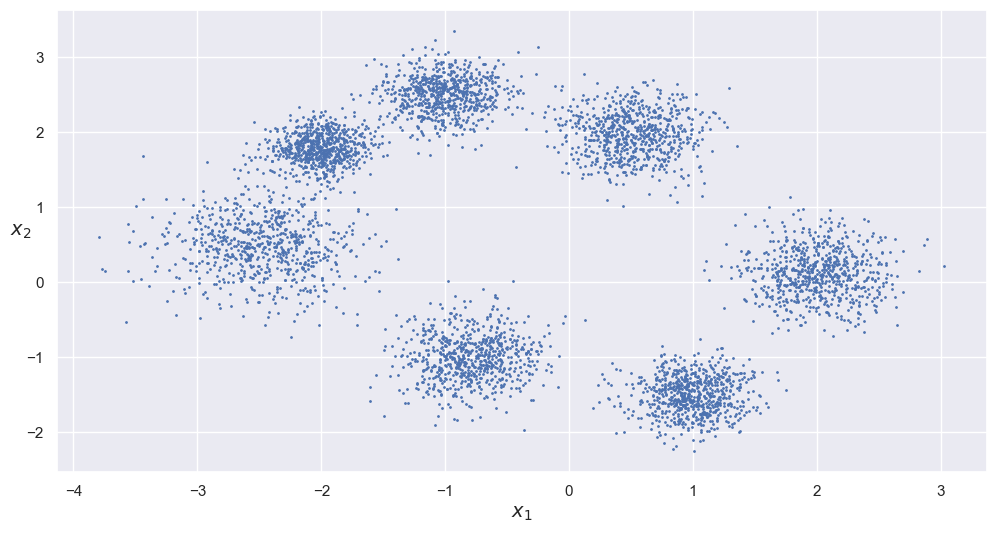

In [18]:
plt.figure(figsize=(12, 6))
# LLamamos a la función
plot_clusters(X)
plt.show()

Este código se utiliza para visualizar un conjunto de datos X en un gráfico de dispersión, donde cada muestra puede estar asociada con una etiqueta (y) que se utiliza para colorear las muestras.

En *Scikit-Learn* puedes usar el objeto [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), indicando el número de clusters deseado.  

In [110]:
from sklearn.cluster import KMeans

k = 7 # número de clusters

# Crear una instancia del modelo KMeans
kmeans = KMeans(n_clusters=k, random_state=42)

# Aplicar el algoritmo KMeans para predecir los clusters
y_pred = kmeans.fit_predict(X)

El código utiliza el algoritmo de KMeans para agrupar los datos en k = 7 clusters y luego imprime las etiquetas de cluster asignadas a cada muestra en X. Las etiquetas (y_pred) proporcionan información sobre a qué cluster pertenece cada muestra según el proceso de clustering realizado por KMeans.

In [111]:
# Imprimir las etiquetas de los clusters asignados a cada muestra de X
print(y_pred.shape)
print(y_pred[:100])

(5000,)
[0 0 3 4 1 0 6 3 0 5 6 3 0 5 6 6 0 3 1 2 2 4 5 2 2 0 0 1 6 5 3 1 5 0 6 2 2
 1 1 3 1 4 6 6 2 1 0 6 4 5 6 5 0 2 4 3 3 3 1 4 4 6 6 5 5 3 5 0 3 2 5 6 4 1
 1 4 0 5 6 6 0 0 4 5 6 2 6 0 5 2 5 6 6 6 3 5 1 4 4 1]


In [112]:
# Calculamos las localizaciones de cada uno de centroides de cada clustering
# Accedemos a los centroides finales de los clusters identificados por KMeans
centroids = kmeans.cluster_centers_

print(centroids.shape)
print(centroids)

(7, 2)
[[ 2.00562466  0.12266145]
 [-2.49863311  0.4466925 ]
 [-1.00523493  2.50801745]
 [ 0.50807237  1.9760658 ]
 [ 0.98666224 -1.50210028]
 [-0.79430633 -1.00359306]
 [-2.01838251  1.77135529]]


In [113]:
# Definir nuevas muestras para predecir sus clusters
X_new = np.array([
    [0, -3], 
    [-3, 1.5], 
    [-1, 2], 
    [-3, 2.5],
    [2, -1],    
    [1, 0],     
    [-2, -2]
])

# Predecir los clusters de las nuevas muestras utilizando el modelo KMeans previamente entrenado, a qué grupo pertenecen
y_pred_new = kmeans.predict(X_new)

# Imprimir las etiquetas de clusters predichas para las nuevas muestras
print("Etiquetas de clusters predichos para cada muestra de X_new:")
print(y_pred_new)

Etiquetas de clusters predichos para cada muestra de X_new:
[4 6 2 6 0 0 5]


In [89]:
def plot_data(X):
    """
    Función para graficar un conjunto de datos en un gráfico de dispersión.

    Parameters:
    X: Matriz de datos donde cada fila representa una muestra y cada columna una característica.
    """
    # Graficar las coordenadas de la primera columna (X[:, 0]) contra la segunda columna (X[:, 1])
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)


def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    """
    Función para graficar los centroides de los clusters.

    Parameters:
    centroids: Coordenadas de los centroides de los clusters.
    weights: Pesos asociados a los centroides.
    circle_color (str): Color de los círculos que representan los centroides.
    cross_color (str): Color de las cruces que representan los centroides.
    """
    if weights is not None:
        # Filtrar los centroides basados en los pesos
        centroids = centroids[weights > weights.max() / 10]

    # Graficar círculos para representar los centroides
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)

    # Graficar cruces "x" para representar los centroides
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1)



def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True, show_xlabels=True, show_ylabels=True):
    """
    Función para graficar los límites de decisión de un algoritmo de clustering.

    Parameters:
    clusterer (estimador de clustering): Objeto de clustering entrenado (kmeans).
    X: Datos de entrada.
    resolution (int): Resolución de la malla para graficar los límites de decisión.
    show_centroids (bool): Indica si se deben mostrar los centroides en el gráfico.
    show_xlabels (bool): Indica si se deben mostrar las etiquetas en el eje x.
    show_ylabels (bool): Indica si se deben mostrar las etiquetas en el eje y.
    """
    
    # Calcular los límites de los datos de entrada con un pequeño margen
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    
    # Generar una malla de puntos para evaluar los límites de decisión
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                        np.linspace(mins[1], maxs[1], resolution))
    
    # Predecir los clusters para cada punto en la malla
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Graficar el mapa de colores que representa los límites de decisión
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')
    
    # Graficar los datos de entrada
    plot_data(X)
    
    # Mostrar los centroides en el gráfico si se especifica
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    # Configurar etiquetas en los ejes x e y según las opciones
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)


""" Estas funciones permiten visualizar de manera efectiva cómo el algoritmo de clustering divide el espacio de 
características en diferentes clusters, lo que facilita la interpretación y evaluación del modelo."""

' Estas funciones permiten visualizar de manera efectiva cómo el algoritmo de clustering divide el espacio de \ncaracterísticas en diferentes clusters, lo que facilita la interpretación y evaluación del modelo.'

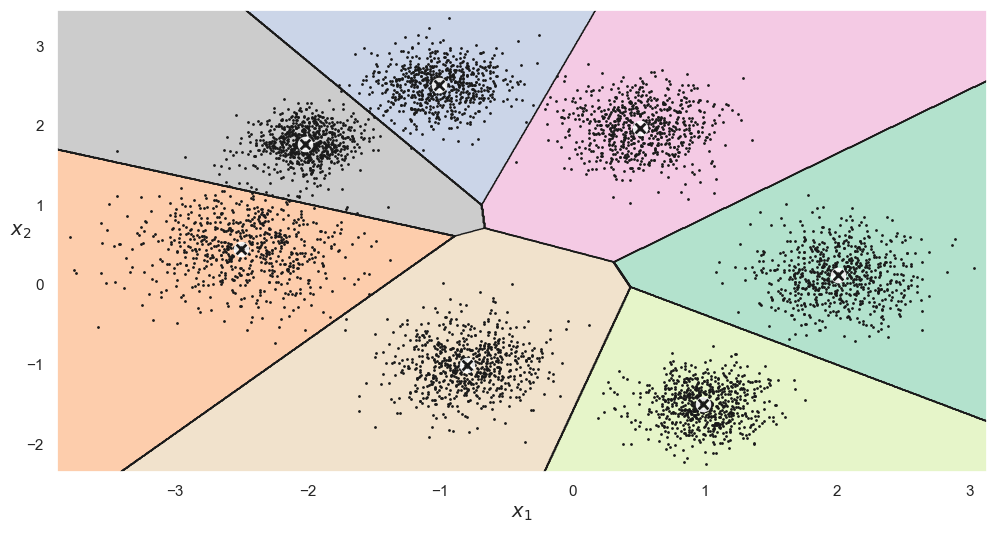

In [114]:
plt.figure(figsize=(12, 6))

# Llama a la función plot_decision_boundaries para visualizar los límites de decisión del modelo kmeans sobre el conjunto de datos X
plot_decision_boundaries(kmeans, X)

# Muestra la figura que contiene la visualización de los límites de decisión
plt.show()


El conjunto de funciones proporcionado permite visualizar de manera interactiva y comprensible cómo un algoritmo de clustering divide un conjunto de datos X en diferentes clusters. La función plot_data(X) muestra las muestras de datos como puntos en un plano cartesiano, donde cada punto representa una muestra con dos características (X[:, 0] y X[:, 1]). La función plot_centroids(centroids) grafica los centroides de los clusters como círculos grandes y cruces pequeñas, proporcionando una representación visual de la ubicación de los clusters en relación con los datos. La función principal plot_decision_boundaries(clusterer, X) calcula y grafica los límites de decisión del algoritmo de clustering sobre una malla de puntos, mostrando cómo se separan y agrupan los datos en diferentes regiones de acuerdo con el modelo de clustering utilizado (clusterer). Esto permite visualizar de manera clara cómo los datos están agrupados y cómo se definen las fronteras entre los clusters en el espacio de características. Las etiquetas de los ejes x e y indican las dimensiones de las características utilizadas en la visualización, proporcionando contexto adicional sobre los datos representados en la gráfica. En conjunto, estas funciones facilitan la interpretación y evaluación visual de los resultados del clustering.

En lugar de asignar un grupo a cada muestra (*hard clustering*) se le puede asignar una puntuación (*soft clustering*) en función de su distancia al centroide.

In [115]:
# Calcular las distancias de cada muestra de X_new a los centroides de los clusters
distances_to_centroids = kmeans.transform(X_new)

# 'distances_to_centroids' es una matriz donde cada fila corresponde a una muestra en X_new
# y cada columna representa la distancia de esa muestra a un centroide específico del cluster.

# Mostramos las distancias de cada muestra a los centroides de los clusters:
print(distances_to_centroids.shape)
print(distances_to_centroids)


(7, 7)
[[3.71127267 4.25709485 5.59899576 5.00193646 1.79365714 2.14861891
  5.18070452]
 [5.1916606  1.16654424 2.23499146 3.54022745 4.99059935 3.33662446
  1.0184334 ]
 [3.5437522  2.15839417 0.50804442 1.50826229 4.02635483 3.01062804
  1.04373432]
 [5.54148147 2.11363205 1.99478118 3.54698165 5.6489187  4.14007837
  1.22249581]
 [1.12267554 4.72552844 4.61926655 3.32908631 1.1309103  2.79430864
  4.88137359]
 [1.01307788 3.52703386 3.21109307 2.03637639 1.50215949 2.05590229
  3.49976178]
 [4.53329026 2.49698601 4.61646822 4.70101332 3.0278797  1.56413683
  3.77140009]]


Este algoritmo funciona asignando centroides de manera aleatoria y, de manera iterativa, asigna cada instancia a uno de ellos (el más cercano) tras lo cual se recalcula el centroide como el valor promedio de todas las instancias asignadas al grupo.

Este código muestra cómo configurar y entrenar instancias de modelos K-Means con diferentes números máximos de iteraciones (max_iter) para ver cómo cambian los centroides y las asignaciones de clusters a medida que aumenta el número de iteraciones. Vamos a explicar cada parte:

In [116]:
# Creamos cuatro instancias de KMeans con diferentes configuraciones para el número de iteraciones máximas del algoritmo de optimización EM.
kmeans_iter1 = KMeans(n_clusters=7, init="random", n_init=1, algorithm="elkan", max_iter=1000, random_state=1)
kmeans_iter2 = KMeans(n_clusters=7, init="random", n_init=1, algorithm="elkan", max_iter=2000, random_state=4)
kmeans_iter3 = KMeans(n_clusters=7, init="random", n_init=1, algorithm="elkan", max_iter=3000, random_state=6)
# kmeans_iter4 = KMeans(n_clusters=7, init="random", n_init=1, algorithm="elkan", max_iter=4000, random_state=7)
# kmeans_iter5 = KMeans(n_clusters=7, init="random", n_init=1, algorithm="elkan", max_iter=5000, random_state=3)
# kmeans_iter6 = KMeans(n_clusters=7, init="random", n_init=1, algorithm="elkan", max_iter=6000, random_state=8)


# Ajustar cada modelo KMeans a los datos de entrada X
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)
# kmeans_iter4.fit(X)
# kmeans_iter5.fit(X)
# kmeans_iter6.fit(X)

KMeans(algorithm='elkan', init='random', max_iter=10000, n_clusters=7, n_init=1,
       random_state=7)

Esto permite comparar cómo evolucionan los centroides de los clusters en cada iteración y cómo afecta esto a la convergencia del algoritmo. Es una forma de explorar cómo el número de iteraciones afecta la calidad de la agrupación resultante.

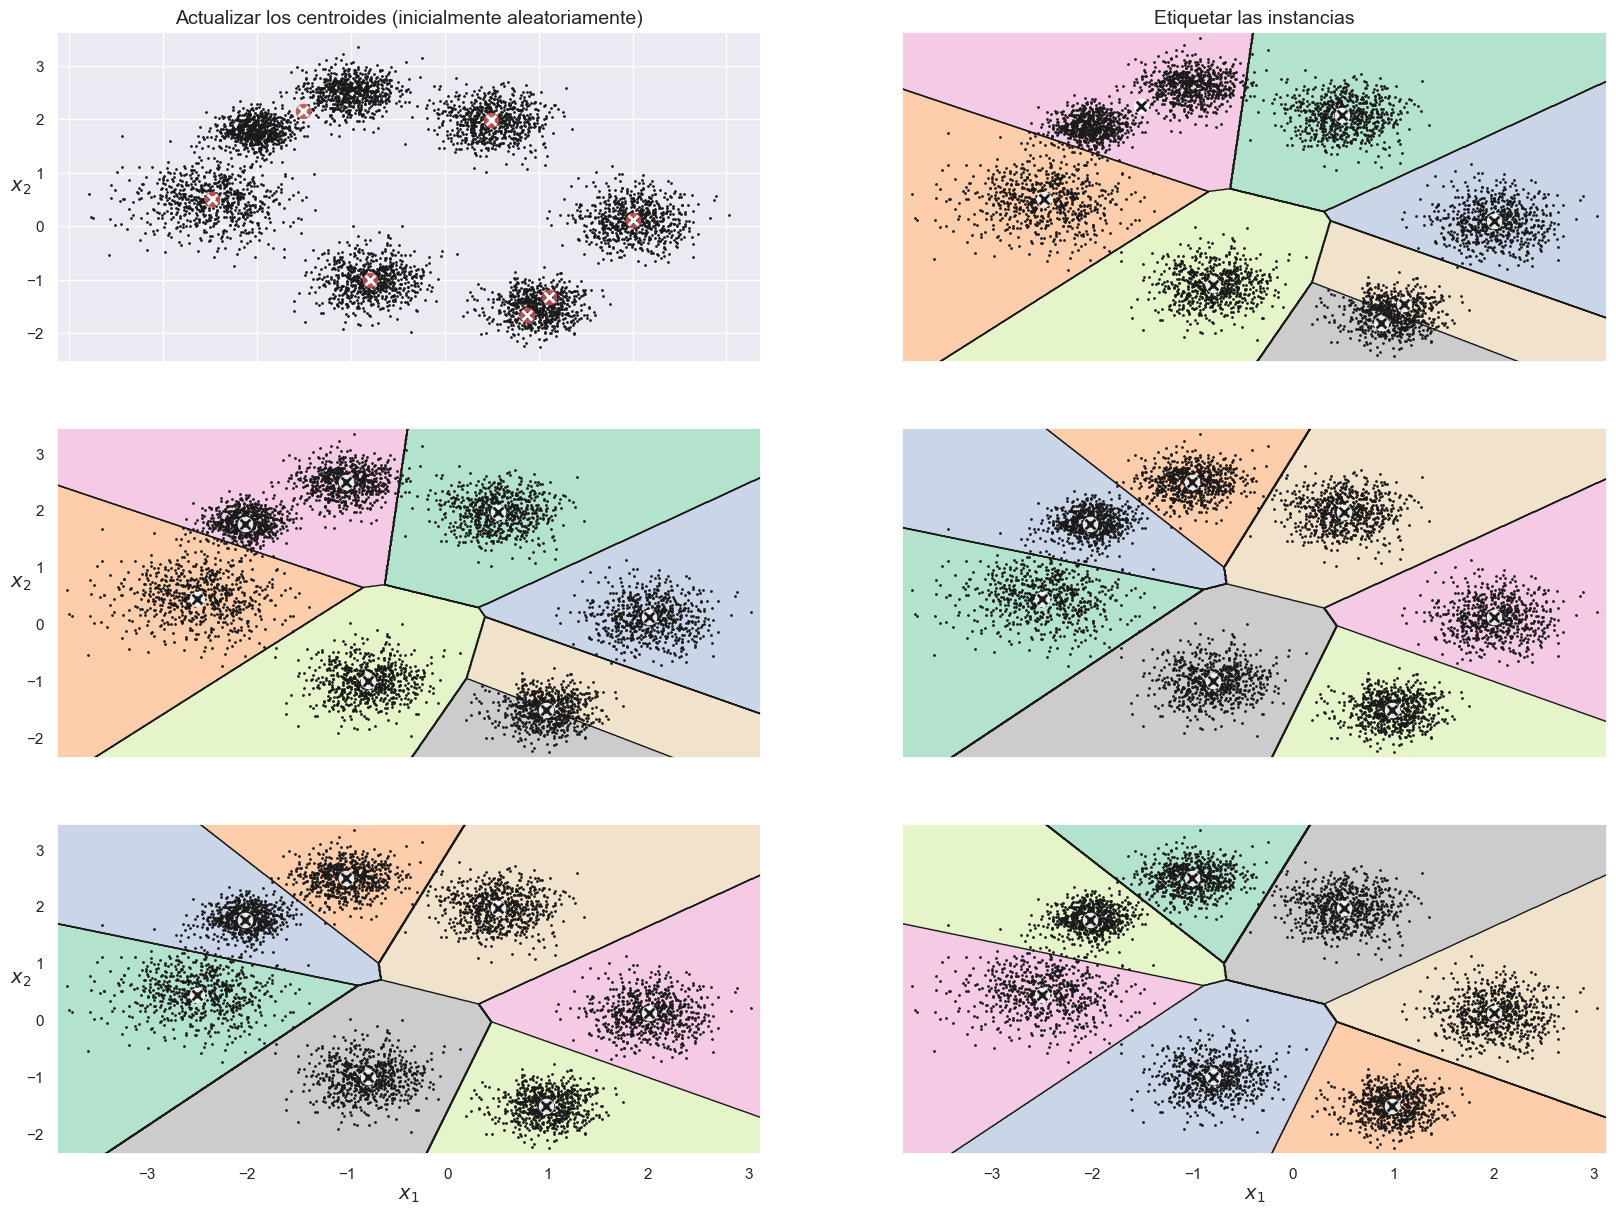

In [121]:
plt.figure(figsize=(20, 30))

# Subplot 1: Visualizar datos y centroides después de la inicialización aleatoria
plt.subplot(6, 2, 1)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Actualizar los centroides (inicialmente aleatoriamente)", fontsize=14)

# Subplot 2: Visualizar los límites de decisión y etiquetar las instancias
plt.subplot(6, 2, 2)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Etiquetar las instancias", fontsize=14)

# Subplot 3: Visualizar límites de decisión sin centroides y luego añadir los del segundo modelo
"""Se eliminan los centroides del gráfico de límites de decisión y se grafican los 
nuevos centroides calculados después de otra iteración del algoritmo"""
plt.subplot(6, 2, 3)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

# Subplot 4: Visualizar límites de decisión del segundo modelo
"""Selecciona la cuarta posición en la cuadrícula. Y se grafican los 
límites de decisión actualizados con el segundo modelo """
plt.subplot(6, 2, 4)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

# Subplot 5: Visualizar límites de decisión sin centroides y luego añadir los del tercer modelo
plt.subplot(6, 2, 5)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

# Subplot 6: Visualizar límites de decisión del tercer modelo
plt.subplot(6, 2, 6)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

# Mostrar todos los subplots juntos
plt.show()


Estos subgráficos proporcionan una representación visual de cómo el algoritmo K-Means progresa a través de las iteraciones y cómo se ajustan los centroides y los límites de los clusters para optimizar la separación de los datos en grupos coherentes. La evolución de los centroides y los límites de decisión se observa claramente a medida que se ejecutan más iteraciones del algoritmo.

Los "límites de decisión" en el contexto de algoritmos de clustering se refieren a las fronteras o líneas que separan las regiones del espacio de características en las cuales se asigna una muestra a un determinado cluster. Estos límites representan las divisiones que el algoritmo de clustering establece para dividir el espacio de características en grupos o clusters distintos.

Esto implica que en función del estado inicial, el algoritmo puede llegar a una solución u otra.

In [132]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    # Ajustar clusterer1 y clusterer2 a los datos X
    clusterer1.fit(X)
    clusterer2.fit(X)

    # Crear una nueva figura con tamaño específico
    plt.figure(figsize=(15, 4))

    # Subtrama izquierda (primer gráfico)
    plt.subplot(121)
    # Graficar los límites de decisión y clusters para clusterer1
    plot_decision_boundaries(clusterer1, X)
    # Agregar título al gráfico si se proporciona title1
    if title1:
        plt.title(title1, fontsize=14)

    # Subtrama derecha (segundo gráfico)
    plt.subplot(122)
    # Graficar los límites de decisión y clusters para clusterer2 sin etiquetas en el eje y
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    # Agregar título al gráfico si se proporciona title2
    if title2:
        plt.title(title2, fontsize=14)


Esta función crea una figura con dos subgráficos lado a lado, donde cada subgráfico muestra los resultados de dos algoritmos de clustering diferentes aplicados a los mismos datos X. Esta visualización comparativa ayuda a evaluar y contrastar la efectividad de los diferentes métodos de clustering en la tarea dada.

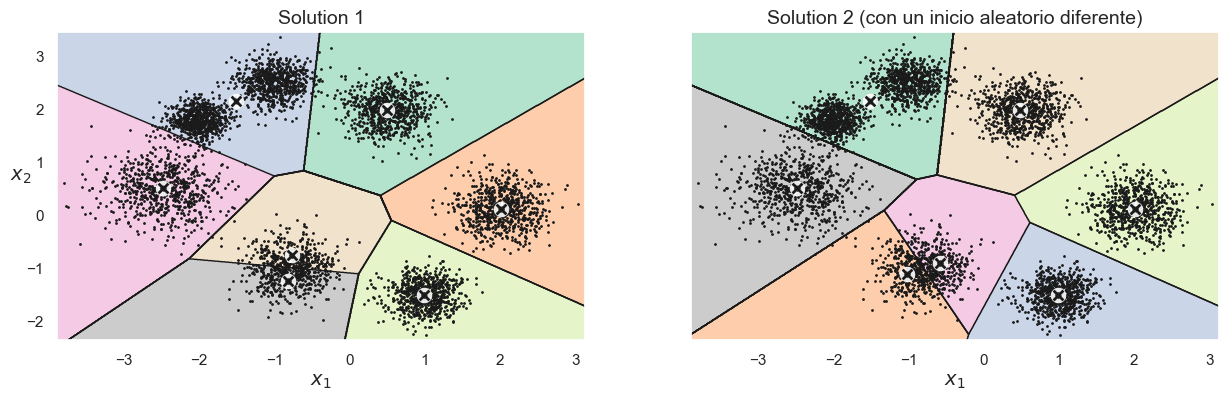

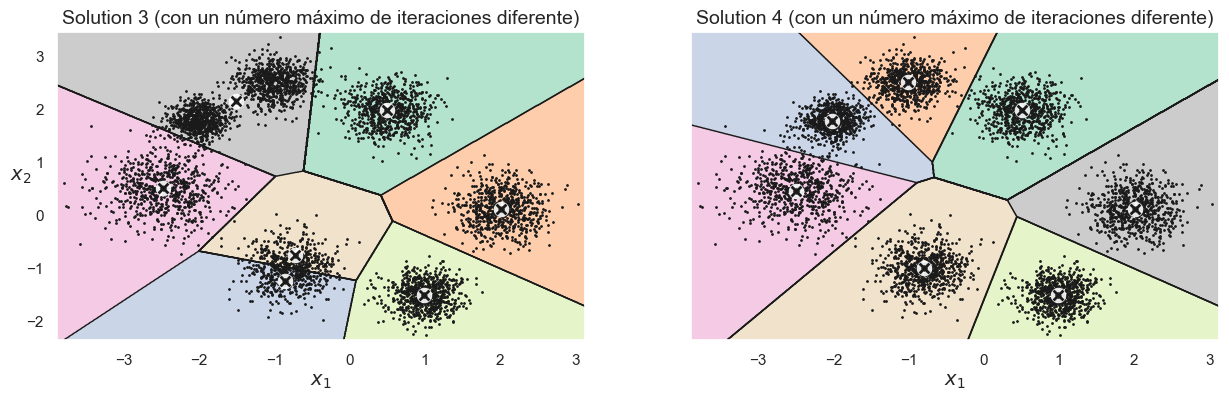

In [134]:
# Crear dos instancias de KMeans con diferentes configuraciones de inicialización aleatoria y algoritmo "elkan"
kmeans_rnd_init1 = KMeans(n_clusters=7, init="random", n_init=1, algorithm="elkan", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=7, init="random", n_init=1, algorithm="elkan", random_state=19)

# Llamar a la función plot_clusterer_comparison para comparar las soluciones de clustering
plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X, "Solution 1", "Solution 2 (con un inicio aleatorio diferente)")


# Probamos con otras configuraciones de KMeans para ver cómo afectan a los límites de decisión y a los clusters identificados.
kmeans_rnd_init3 = KMeans(n_clusters=7, init="random", n_init=1, algorithm="elkan", max_iter=100, random_state=12)
kmeans_rnd_init4 = KMeans(n_clusters=7, init="random", n_init=1, algorithm="elkan", max_iter=200, random_state=15)

plot_clusterer_comparison(kmeans_rnd_init3, kmeans_rnd_init4, X, "Solution 3 (con un número máximo de iteraciones diferente)", "Solution 4 (con un número máximo de iteraciones diferente)")

# Mostramos las graficas 
plt.show()

Para minimizar el impacto de la inicialización tenemos varias alternativas: probar varias y quedarnos con la mejor, o usar la inicialización inteligente que ofrece *Scikit-Learn* por defecto.

In [140]:

# Crear una instancia de KMeans sin especificar el método de inicialización (por defecto utiliza k-means++)
kmeans_rnd_10_inits = KMeans(n_clusters=7, init="random", n_init=10, algorithm="elkan", random_state=11)
# Ajustamos el modelo KMeans a los datos de entrada X utilizando el método fit()
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='elkan', init='random', n_clusters=7, n_init=10,
       random_state=11)

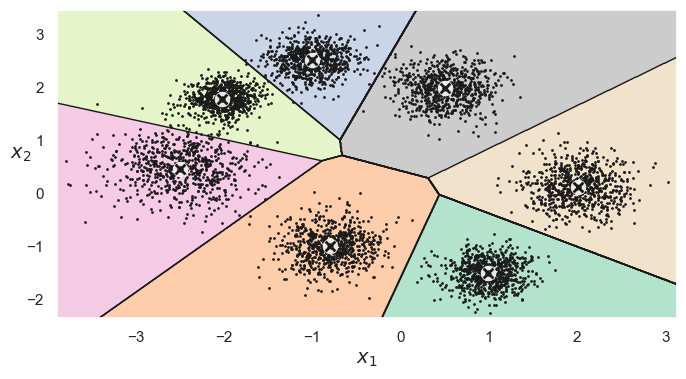

In [141]:
# Visualización de los límites de decisión generados por el algoritmo
plt.figure(figsize=(8, 4))

# Dibujamos los límites de decisión del modelo de clustering utilizando la función plot_decision_boundaries()
# Esta función muestra cómo se agrupan los datos según las decisiones de clustering realizadas por el modelo KMeans.
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

Otras mejoras al algoritmo de *K-Means* incluyen: *K-Means* acelerados (usado por *Scikit-Learn* por defecto y que evita algunos cálculos de distancias) y *mini-batch K-Means* (que puedes usarse si el dataset es tan grande que no cabe en memoria). Vamos a ver un ejemplo de este último caso con el dataset MNIST, para lo cual usaremos el objeto [MiniBatchKMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html?highlight=minibatchkmeans#sklearn.cluster.MiniBatchKMeans).

In [142]:
from sklearn.datasets import fetch_openml
import numpy as np

# Cargar el conjunto de datos MNIST desde OpenML
mnist = fetch_openml('mnist_784', version=1)

# Convertir las etiquetas del conjunto de datos a tipo int64
mnist.target = mnist.target.astype(np.int64)

In [143]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(mnist["data"], mnist["target"], random_state=42)

In [148]:
def load_next_batch(batch_size):
    # np.random.choice(len(X), batch_size, replace=False) elige aleatoriamente índices de X sin reemplazo
    # batch_size es el tamaño del lote que queremos cargar un conjunto de datos mas pequeños
    indices = np.random.choice(len(X), batch_size, replace=False) 
    
    # Retorna las muestras correspondientes a los índices seleccionados de batch_size indices
    return X[indices]

Esta función load_next_batch se utiliza para cargar un lote aleatorio de datos de tamaño batch_size de la matriz X. Es útil para entrenar modelos de aprendizaje automático utilizando el método de descenso de gradiente estocástico (SGD) o para procesar grandes conjuntos de datos por lotes durante el entrenamiento.

In [149]:
# Importamos la clase MiniBatchKMeans de la librería sklearn.cluster
from sklearn.cluster import MiniBatchKMeans

# Definición de parámetros
k = 7  # Número de clústeres
n_init = 10  # Número de inicializaciones diferentes
n_iterations = 100  # Número máximo de iteraciones por inicialización

init_size = 500  # Tamaño del lote inicial para ajustar parcialmente el modelo
batch_size = 100  # Tamaño del lote utilizado en cada iteración
evaluate_on_last_n_iters = 10  # Número de últimas iteraciones utilizadas para evaluar el modelo

# Para almacenar el mejor modelo encontrado.
best_kmeans = None

# Bucle para realizar múltiples inicializaciones y seleccionar el mejor modelo
for init in range(n_init):
    # Crear una instancia de MiniBatchKMeans con los parámetros especificados
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    
    # Cargar un lote inicial para ajustar parcialmente el modelo
    X_init = load_next_batch(init_size)  # Es un lote inicial utilizado para ajustar parcialmente el modelo al principio.
    minibatch_kmeans.partial_fit(X_init) # Ajustar parcialmente el modelo

    # Inicializar la suma de la inercia total para evaluar el modelo
    minibatch_kmeans.sum_inertia_ = 0
    
    # Bucle para ajustar el modelo por lotes durante un número fijo de iteraciones
    for iteration in range(n_iterations):
        # Cargar un lote de datos para ajustar parcialmente el modelo
        X_batch = load_next_batch(batch_size) # Cada X_batch es una muestra aleatoria extraída del conjunto de datos completo.
        minibatch_kmeans.partial_fit(X_batch)
        
        # Calcular y acumular la inercia en las últimas iteraciones
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    # Actualizar el mejor modelo encontrado hasta ahora
    if (best_kmeans is None or minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans


El código utiliza el algoritmo MiniBatchKMeans de Scikit-Learn para realizar múltiples inicializaciones y ajustes parciales del modelo de clustering. Durante cada inicialización, se ajusta el modelo parcialmente con un lote inicial de datos y luego se continúa ajustando con lotes de datos adicionales extraídos aleatoriamente. Se evalúa la calidad del modelo utilizando la inercia acumulada en las últimas iteraciones, y se selecciona el mejor modelo en función de esta métrica. En resumen, el objetivo es encontrar el modelo MiniBatchKMeans más efectivo mediante un proceso iterativo de ajuste parcial y evaluación.

Al finalizar el bucle, best_kmeans contendrá el modelo MiniBatchKMeans que tiene la menor suma de inercia acumulada entre todas las inicializaciones, lo que representa la mejor solución encontrada según estos criterios.

La Inercia mide cuán compactos y bien separados están los clusters. Un valor más bajo de inercia indica que los puntos dentro de cada cluster están más cerca de su centroide, lo que se considera un mejor clustering.

In [154]:
# Calcular la puntuación del modelo `best_kmeans` aplicado a los datos `X`
best_kmeans.score(X)

print(best_kmeans.score(X))

# Visualizar los centroides del modelo `best_kmeans`
print(best_kmeans.cluster_centers_)

"""La puntuación en este contexto representa la negación de la inercia del modelo.
Una puntuación más alta (menos negativa) indica una mejor agrupación de los datos."""

-828.0639525131544
[[ 0.51004237  1.98345773]
 [-0.7892986  -1.01050223]
 [-2.01426188  1.76607633]
 [-0.99686886  2.50753496]
 [ 2.00734857  0.1202287 ]
 [ 0.99850443 -1.50510917]
 [-2.49960257  0.4456241 ]]


'La puntuación en este contexto representa la negación de la inercia del modelo.\nUna puntuación más alta (menos negativa) indica una mejor agrupación de los datos.'

## **Encontrando el número óptimo de Clusters (grupos)**

Como hemos visto anteriormente, el número de grupos o *clusters* es un hyperparámetro del modelo que debemos definir, y como podrás imaginar si nuestros datos no están etiquetados no será imposible saber qué valor usar. Para ello la solución se basa en usar diferentes valores y utilizar alguna métrica significativa. Una de estas métricas se conoce como el *silhouette score*, que se basa en calcular el coeficiente de silueta (*silhouette coefficient*) de todas las muestras del dataset como $(b-a)/\mathrm{max}(a,b)$ donde $a$ es la distancia mínima al resto de muestras del mismo grupo y $b$ es la distancia media de los grupos más cercanos. Su valor se encuentra entre $1$ y $-1$. Un valor cercano a $1$ indica que la muestra está bien metida en su grupo y lejos de los demás mientras que un valor cercano a $0$ indica que la muestra se encuentra cerca de una frontera de decisión y un valor cercano a $-1$ indica que la muestra está en el grupo incorrecto.

In [155]:
from sklearn.metrics import silhouette_score

# Calcular el coeficiente de silueta para evaluar la calidad de los clústeres
silhouette_score(X, kmeans.labels_)

0.6641857851196089

El coeficiente de silueta se utiliza para evaluar la calidad de la agrupación. Un valor de coeficiente de silueta cercano a 1 indica una buena separación entre los clústeres y una mala separación entre diferentes clústeres, mientras que un valor cercano a -1 indica que las muestras pueden estar asignadas al grupo incorrecto. Un valor cercano a 0 indica que las muestras están cerca de la frontera entre dos clústeres.

Calculando la métrica para diferentes números de clusters podemos encontrar el valor óptimo.

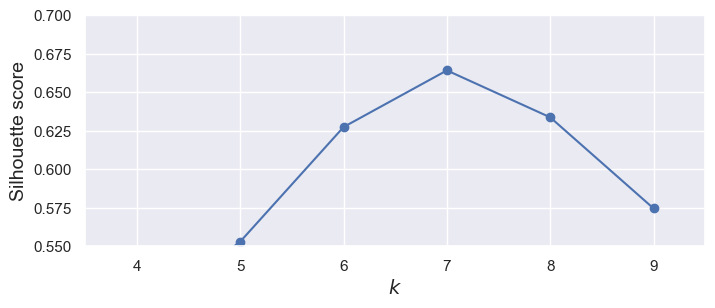

In [188]:
# Crear una lista de modelos KMeans ajustados para diferentes números de clusters (de 1 a n)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]

# Calcular el coeficiente de silueta para cada modelo KMeans (excepto el primero, con un solo cluster)
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))

# Graficar el coeficiente de silueta en función del número de clusters (de 2 a n)
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

# Establecer los límites de los ejes x e y para enfocar la visualización en un rango específico
plt.axis([3.5, 9.5, 0.55, 0.7])

plt.show()


En la gráfica resultante, el eje x representa el número de clusters (k), mientras que el eje y representa el valor del coeficiente de silueta. El objetivo es identificar el número óptimo de clusters (k) que maximiza el coeficiente de silueta, lo cual indica la mejor estructura de agrupación para los datos. En este ejemplo, la gráfica muestra cómo varía el coeficiente de silueta a medida que cambia el número de clusters, ayudando a seleccionar el número de clusters más adecuado para el problema de clustering.

In [181]:
print(kmeans_per_k)
# Imprimir los coeficientes de silueta para cada modelo KMeans ajustado
silhouette_scores

[KMeans(n_clusters=1, random_state=42), KMeans(n_clusters=2, random_state=42), KMeans(n_clusters=3, random_state=42), KMeans(n_clusters=4, random_state=42), KMeans(n_clusters=5, random_state=42), KMeans(n_clusters=6, random_state=42), KMeans(n_clusters=7, random_state=42), KMeans(random_state=42), KMeans(n_clusters=9, random_state=42)]


[0.5142729942203046,
 0.5004698053338312,
 0.5018787333038701,
 0.553017495921583,
 0.627418826233271,
 0.6641857851196089,
 0.6336939502610852,
 0.5745550209588156]

También es muy útil visualizar los diagramas de silueta, en el que visualizaremos todos los coeficientes de silueta ordenados por grupos y su valor.

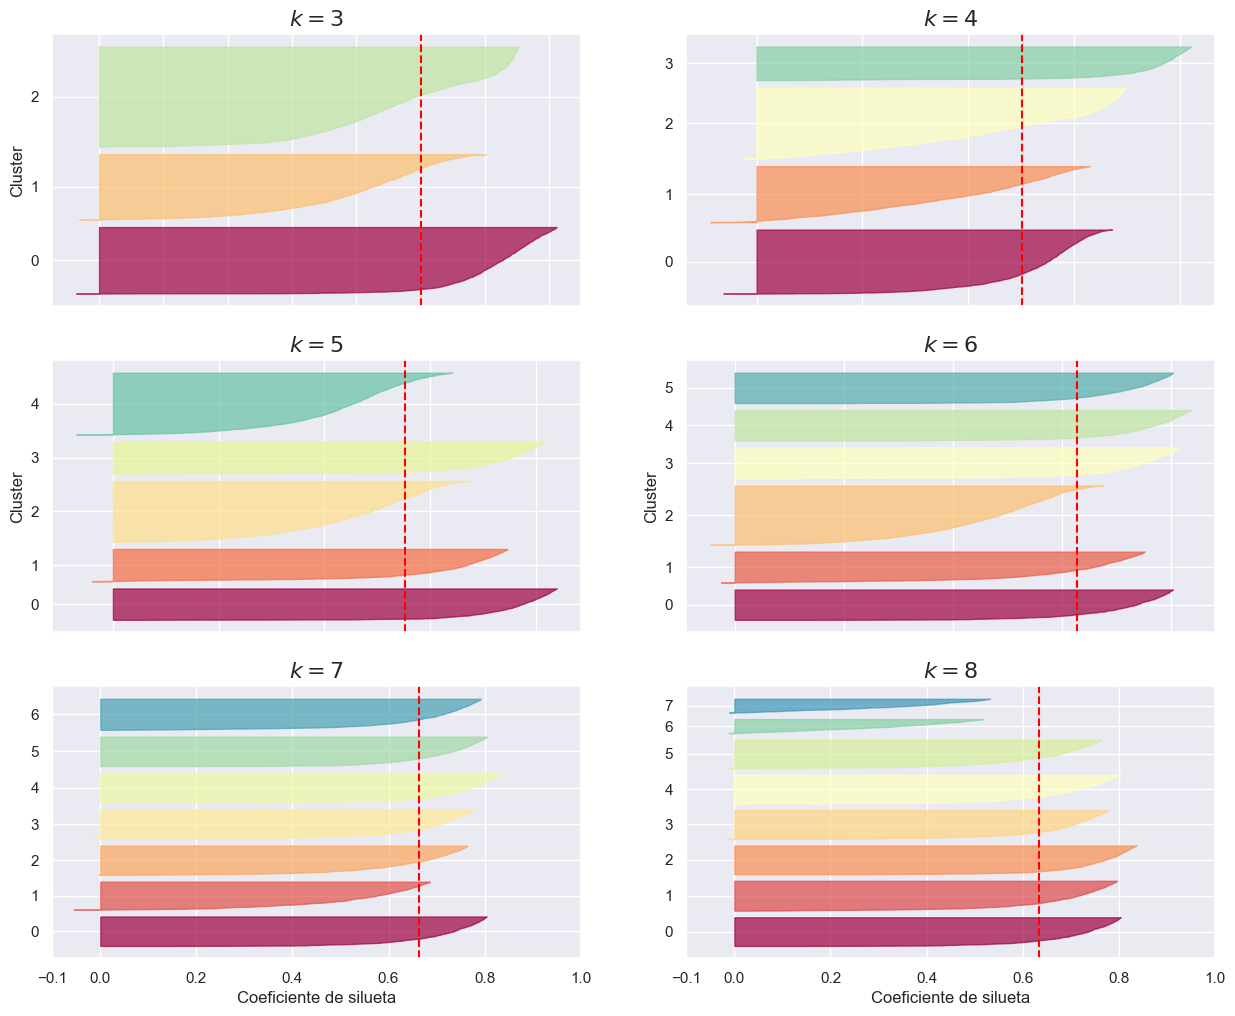

In [204]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

# Configurar la figura para mostrar los subplots
plt.figure(figsize=(15, 12))

# Iterar sobre diferentes valores de k para crear subplots
for k in (3, 4, 5, 6, 7, 8):
    plt.subplot(3, 2, k - 2)  # Seleccionar la posición del subplot en la cuadrícula

    # Obtener las etiquetas predichas por el modelo de k-means para el valor actual de k
    y_pred = kmeans_per_k[k - 1].labels_

    # Calcular los coeficientes de silueta para cada muestra
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30  # Espaciado entre clusters en el gráfico
    pos = padding  # Posición inicial para los clusters en el gráfico
    ticks = []  # Lista de posiciones de los ticks del eje y

    # Iterar sobre cada cluster (i) dentro del valor actual de k
    for i in range(k):
        # Seleccionar los coeficientes de silueta para el cluster i
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()  # Ordenar los coeficientes de silueta

        # Asignar un color al área de relleno según el cluster
        color = mpl.cm.Spectral(i / k)
        
        # Rellenar el área entre los coeficientes de silueta para el cluster i
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                        facecolor=color, edgecolor=color, alpha=0.7)
        
        # Calcular la posición del tick para el cluster en el eje y
        ticks.append(pos + len(coeffs) // 2)
        
        # Actualizar la posición para el próximo cluster
        pos += len(coeffs) + padding

    # Configurar los ticks y etiquetas del eje y
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    
    # Configuración de etiquetas en los ejes
    if k in (3, 5):
        plt.ylabel("Cluster")
        
    if k in (5, 6):
        plt.ylabel("Cluster")
    
    if k in (7, 8):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Coeficiente de silueta")
    else:
        plt.tick_params(labelbottom=False)

    # Dibujar una línea vertical en el coeficiente de silueta global para el valor de k actual
    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    
    # Configurar el título del subplot
    plt.title("$k={}$".format(k), fontsize=16)

# Mostrar la figura con los subplots de los diagramas de silueta
plt.show()


EL código utiliza los coeficientes de silueta para visualizar cómo están distribuidas las muestras dentro de cada cluster para diferentes valores de k, ayudando a identificar el número óptimo de clusters mediante el análisis de la cohesión interna y la separación entre clusters. La línea vertical roja indica el valor global del coeficiente de silueta para cada número de clusters, lo que facilita la comparación y selección del número óptimo de clusters.

## ==========================================================================================================

# **K-Means para aprendizaje semi-supervisado**

El aprendizaje semi-supervisado (o *Semi-supervised Learning*) comprende el conjunto de técnicas que nos permiten entrenar modelos con datasets parcialmente etiquetados. En esta sección vamos a ver un ejemplo de como podemos aplicar esta técnica con el dataset MNIST y usando *K-Means*. Empezamos descargando el dataset.

In [205]:
# Plotting library
from matplotlib import pyplot

# se utiliza para el manejo de rutas y directorios.
import os
# Calculo cientifico y vectorial para python
import numpy as np
# Librerias para graficar
import matplotlib.pyplot as plt
import pandas as pd
# Modulo de optimización de scipy
from scipy import optimize
#Para separa el Dataset 20% y 80% para diferentes pruebas
from sklearn.model_selection import train_test_split
# para aumentar datos en un dataset
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle

In [206]:
# Configurar Pandas para que no corte la visualización
pd.set_option('display.max_rows', 50)  # Mostrar todas las filas (60 -> None)
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas (20 -> None)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

In [207]:
# Obtenemos los datos
df = pd.read_csv('./typedCSV.csv', delimiter=',')
df

,label,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,pixel 10,pixel 11,pixel 12,pixel 13,pixel 14,pixel 15,pixel 16,pixel 17,pixel 18,pixel 19,pixel 20,pixel 21,pixel 22,pixel 23,pixel 24,pixel 25,pixel 26,pixel 27,pixel 28,pixel 29,pixel 30,pixel 31,pixel 32,pixel 33,pixel 34,pixel 35,pixel 36,pixel 37,pixel 38,pixel 39,pixel 40,pixel 41,pixel 42,pixel 43,pixel 44,pixel 45,pixel 46,pixel 47,pixel 48,pixel 49,pixel 50,pixel 51,pixel 52,pixel 53,pixel 54,pixel 55,pixel 56,pixel 57,pixel 58,pixel 59,pixel 60,pixel 61,pixel 62,pixel 63,pixel 64,pixel 65,pixel 66,pixel 67,pixel 68,pixel 69,pixel 70,pixel 71,pixel 72,pixel 73,pixel 74,pixel 75,pixel 76,pixel 77,pixel 78,pixel 79,pixel 80,pixel 81,pixel 82,pixel 83,pixel 84,pixel 85,pixel 86,pixel 87,pixel 88,pixel 89,pixel 90,pixel 91,pixel 92,pixel 93,pixel 94,pixel 95,pixel 96,pixel 97,pixel 98,pixel 99,pixel 100,pixel 101,pixel 102,pixel 103,pixel 104,pixel 105,pixel 106,pixel 107,pixel 108,pixel 109,pixel 110,pixel 111,pixel 112,pixel 113,pixel 114,pixel 115,pixel 116,pixel 117,pixel 118,pixel 119,pixel 120,pixel 121,pixel 122,pixel 123,pixel 124,pixel 125,pixel 126,pixel 127,pixel 128,pixel 129,pixel 130,pixel 131,pixel 132,pixel 133,pixel 134,pixel 135,pixel 136,pixel 137,pixel 138,pixel 139,pixel 140,pixel 141,pixel 142,pixel 143,pixel 144,pixel 145,pixel 146,pixel 147,pixel 148,pixel 149,pixel 150,pixel 151,pixel 152,pixel 153,pixel 154,pixel 155,pixel 156,pixel 157,pixel 158,pixel 159,pixel 160,pixel 161,pixel 162,pixel 163,pixel 164,pixel 165,pixel 166,pixel 167,pixel 168,pixel 169,pixel 170,pixel 171,pixel 172,pixel 173,pixel 174,pixel 175,pixel 176,pixel 177,pixel 178,pixel 179,pixel 180,pixel 181,pixel 182,pixel 183,pixel 184,pixel 185,pixel 186,pixel 187,pixel 188,pixel 189,pixel 190,pixel 191,pixel 192,pixel 193,pixel 194,pixel 195,pixel 196,pixel 197,pixel 198,pixel 199,pixel 200,pixel 201,pixel 202,pixel 203,pixel 204,pixel 205,pixel 206,pixel 207,pixel 208,pixel 209,pixel 210,pixel 211,pixel 212,pixel 213,pixel 214,pixel 215,pixel 216,pixel 217,pixel 218,pixel 219,pixel 220,pixel 221,pixel 222,pixel 223,pixel 224,pixel 225,pixel 226,pixel 227,pixel 228,pixel 229,pixel 230,pixel 231,pixel 232,pixel 233,pixel 234,pixel 235,pixel 236,pixel 237,pixel 238,pixel 239,pixel 240,pixel 241,pixel 242,pixel 243,pixel 244,pixel 245,pixel 246,pixel 247,pixel 248,pixel 249,pixel 250,pixel 251,pixel 252,pixel 253,pixel 254,pixel 255,pixel 256,pixel 257,pixel 258,pixel 259,pixel 260,pixel 261,pixel 262,pixel 263,pixel 264,pixel 265,pixel 266,pixel 267,pixel 268,pixel 269,pixel 270,pixel 271,pixel 272,pixel 273,pixel 274,pixel 275,pixel 276,pixel 277,pixel 278,pixel 279,pixel 280,pixel 281,pixel 282,pixel 283,pixel 284,pixel 285,pixel 286,pixel 287,pixel 288,pixel 289,pixel 290,pixel 291,pixel 292,pixel 293,pixel 294,pixel 295,pixel 296,pixel 297,pixel 298,pixel 299,pixel 300,pixel 301,pixel 302,pixel 303,pixel 304,pixel 305,pixel 306,pixel 307,pixel 308,pixel 309,pixel 310,pixel 311,pixel 312,pixel 313,pixel 314,pixel 315,pixel 316,pixel 317,pixel 318,pixel 319,pixel 320,pixel 321,pixel 322,pixel 323,pixel 324,pixel 325,pixel 326,pixel 327,pixel 328,pixel 329,pixel 330,pixel 331,pixel 332,pixel 333,pixel 334,pixel 335,pixel 336,pixel 337,pixel 338,pixel 339,pixel 340,pixel 341,pixel 342,pixel 343,pixel 344,pixel 345,pixel 346,pixel 347,pixel 348,pixel 349,pixel 350,pixel 351,pixel 352,pixel 353,pixel 354,pixel 355,pixel 356,pixel 357,pixel 358,pixel 359,pixel 360,pixel 361,pixel 362,pixel 363,pixel 364,pixel 365,pixel 366,pixel 367,pixel 368,pixel 369,pixel 370,pixel 371,pixel 372,pixel 373,pixel 374,pixel 375,pixel 376,pixel 377,pixel 378,pixel 379,pixel 380,pixel 381,pixel 382,pixel 383,pixel 384,pixel 385,pixel 386,pixel 387,pixel 388,pixel 389,pixel 390,pixel 391,pixel 392,pixel 393,pixel 394,pixel 395,pixel 396,pixel 397,pixel 398,pixel 399,pixel 400,pixel 401,pixel 402,pixel 403,pixel 404,pixel 405,pixel 406,pixel 407,pixel 408,pixel 409,pix

In [208]:
# Mezclar el conjunto de datos
data = shuffle(df, random_state=42)

In [209]:

# Aplicando la libreria, separamos los datos del 80% y 20% del Dataset
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Dividimos los datos para X_test y y_test donde seran los datos para el prueba
X_test = test_data.drop(['label'], axis=1)
y_test = test_data['label']

# Dividimos los datos para X_train y y_train donde seran los datos para el entrenamiento
X_train = train_data.drop(['label'], axis=1)
y_train = train_data['label']
m_train = len(y_train)

# Mostramos la cantidad de ejemplos que tienen X_train y y_train
print('-' * 80)
print("El 80% de ejemplos que seran para el entrenamiento son: {:.0f}".format(len(train_data)))
print("El 20% de ejemplos que seran para el entrenamiento son: {:.0f}".format(len(test_data)))

--------------------------------------------------------------------------------
El 80% de ejemplos que seran para el entrenamiento son: 50393
El 20% de ejemplos que seran para el entrenamiento son: 12599


In [210]:
# Mostramos los datos de entrenamiento
X_train

,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,pixel 10,pixel 11,pixel 12,pixel 13,pixel 14,pixel 15,pixel 16,pixel 17,pixel 18,pixel 19,pixel 20,pixel 21,pixel 22,pixel 23,pixel 24,pixel 25,pixel 26,pixel 27,pixel 28,pixel 29,pixel 30,pixel 31,pixel 32,pixel 33,pixel 34,pixel 35,pixel 36,pixel 37,pixel 38,pixel 39,pixel 40,pixel 41,pixel 42,pixel 43,pixel 44,pixel 45,pixel 46,pixel 47,pixel 48,pixel 49,pixel 50,pixel 51,pixel 52,pixel 53,pixel 54,pixel 55,pixel 56,pixel 57,pixel 58,pixel 59,pixel 60,pixel 61,pixel 62,pixel 63,pixel 64,pixel 65,pixel 66,pixel 67,pixel 68,pixel 69,pixel 70,pixel 71,pixel 72,pixel 73,pixel 74,pixel 75,pixel 76,pixel 77,pixel 78,pixel 79,pixel 80,pixel 81,pixel 82,pixel 83,pixel 84,pixel 85,pixel 86,pixel 87,pixel 88,pixel 89,pixel 90,pixel 91,pixel 92,pixel 93,pixel 94,pixel 95,pixel 96,pixel 97,pixel 98,pixel 99,pixel 100,pixel 101,pixel 102,pixel 103,pixel 104,pixel 105,pixel 106,pixel 107,pixel 108,pixel 109,pixel 110,pixel 111,pixel 112,pixel 113,pixel 114,pixel 115,pixel 116,pixel 117,pixel 118,pixel 119,pixel 120,pixel 121,pixel 122,pixel 123,pixel 124,pixel 125,pixel 126,pixel 127,pixel 128,pixel 129,pixel 130,pixel 131,pixel 132,pixel 133,pixel 134,pixel 135,pixel 136,pixel 137,pixel 138,pixel 139,pixel 140,pixel 141,pixel 142,pixel 143,pixel 144,pixel 145,pixel 146,pixel 147,pixel 148,pixel 149,pixel 150,pixel 151,pixel 152,pixel 153,pixel 154,pixel 155,pixel 156,pixel 157,pixel 158,pixel 159,pixel 160,pixel 161,pixel 162,pixel 163,pixel 164,pixel 165,pixel 166,pixel 167,pixel 168,pixel 169,pixel 170,pixel 171,pixel 172,pixel 173,pixel 174,pixel 175,pixel 176,pixel 177,pixel 178,pixel 179,pixel 180,pixel 181,pixel 182,pixel 183,pixel 184,pixel 185,pixel 186,pixel 187,pixel 188,pixel 189,pixel 190,pixel 191,pixel 192,pixel 193,pixel 194,pixel 195,pixel 196,pixel 197,pixel 198,pixel 199,pixel 200,pixel 201,pixel 202,pixel 203,pixel 204,pixel 205,pixel 206,pixel 207,pixel 208,pixel 209,pixel 210,pixel 211,pixel 212,pixel 213,pixel 214,pixel 215,pixel 216,pixel 217,pixel 218,pixel 219,pixel 220,pixel 221,pixel 222,pixel 223,pixel 224,pixel 225,pixel 226,pixel 227,pixel 228,pixel 229,pixel 230,pixel 231,pixel 232,pixel 233,pixel 234,pixel 235,pixel 236,pixel 237,pixel 238,pixel 239,pixel 240,pixel 241,pixel 242,pixel 243,pixel 244,pixel 245,pixel 246,pixel 247,pixel 248,pixel 249,pixel 250,pixel 251,pixel 252,pixel 253,pixel 254,pixel 255,pixel 256,pixel 257,pixel 258,pixel 259,pixel 260,pixel 261,pixel 262,pixel 263,pixel 264,pixel 265,pixel 266,pixel 267,pixel 268,pixel 269,pixel 270,pixel 271,pixel 272,pixel 273,pixel 274,pixel 275,pixel 276,pixel 277,pixel 278,pixel 279,pixel 280,pixel 281,pixel 282,pixel 283,pixel 284,pixel 285,pixel 286,pixel 287,pixel 288,pixel 289,pixel 290,pixel 291,pixel 292,pixel 293,pixel 294,pixel 295,pixel 296,pixel 297,pixel 298,pixel 299,pixel 300,pixel 301,pixel 302,pixel 303,pixel 304,pixel 305,pixel 306,pixel 307,pixel 308,pixel 309,pixel 310,pixel 311,pixel 312,pixel 313,pixel 314,pixel 315,pixel 316,pixel 317,pixel 318,pixel 319,pixel 320,pixel 321,pixel 322,pixel 323,pixel 324,pixel 325,pixel 326,pixel 327,pixel 328,pixel 329,pixel 330,pixel 331,pixel 332,pixel 333,pixel 334,pixel 335,pixel 336,pixel 337,pixel 338,pixel 339,pixel 340,pixel 341,pixel 342,pixel 343,pixel 344,pixel 345,pixel 346,pixel 347,pixel 348,pixel 349,pixel 350,pixel 351,pixel 352,pixel 353,pixel 354,pixel 355,pixel 356,pixel 357,pixel 358,pixel 359,pixel 360,pixel 361,pixel 362,pixel 363,pixel 364,pixel 365,pixel 366,pixel 367,pixel 368,pixel 369,pixel 370,pixel 371,pixel 372,pixel 373,pixel 374,pixel 375,pixel 376,pixel 377,pixel 378,pixel 379,pixel 380,pixel 381,pixel 382,pixel 383,pixel 384,pixel 385,pixel 386,pixel 387,pixel 388,pixel 389,pixel 390,pixel 391,pixel 392,pixel 393,pixel 394,pixel 395,pixel 396,pixel 397,pixel 398,pixel 399,pixel 400,pixel 401,pixel 402,pixel 403,pixel 404,pixel 405,pixel 406,pixel 407,pixel 408,pixel 409,pixel 410

### Normalización de los datos de entrenamiento y prueba

In [211]:
import numpy as np

# Normalizar las imágenes de entrenamiento y prueba
X_train_ = X_train / 255.0
X_test_ = X_test / 255.0

In [212]:
# Mostramos los datos normalizados
X_train_

pixel 0   pixel 1   pixel 2   pixel 3   pixel 4   pixel 5   pixel 6  \
31016  1.000000  0.980392  1.000000  1.000000  0.984314  1.000000  0.984314   
32028  1.000000  0.988235  1.000000  1.000000  1.000000  0.984314  1.000000   
48558  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
32830  0.984314  1.000000  0.992157  1.000000  0.996078  0.980392  1.000000   
37466  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
...         ...       ...       ...       ...       ...       ...       ...   
22399  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
32687  0.984314  1.000000  0.988235  0.988235  1.000000  1.000000  0.988235   
43782  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
46145  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1445   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

        pixel 7   pixel 8   pixel 9  pixel 10  pixel 11  pixel 12  pixel 13  \
31016  0.996078  0.988235  1.000000  1.000000  0.972549  1.000000  0.988235   
32028  1.000000  1.000000  0.996078  0.992157  1.000000  0.988235  1.000000   
48558  1.000000  0.992157  0.996078  1.000000  1.000000  1.000000  1.000000   
32830  0.980392  0.996078  0.996078  1.000000  0.984314  0.992157  1.000000   
37466  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
...         ...       ...       ...       ...       ...       ...       ...   
22399  1.000000  1.000000  0.972549  1.000000  0.992157  0.984314  0.996078   
32687  1.000000  1.000000  0.996078  1.000000  1.000000  0.996078  0.988235   
43782  1.000000  0.988235  0.992157  1.000000  0.984314  1.000000  1.000000   
46145  1.000000  1.000000  1.000000  1.000000  0.996078  1.000000  0.976471   
1445   1.000000  1.000000  1.000000  0.976471  1.000000  1.000000  0.988235   

       pixel 14  pixel 15  pixel 16  pixel 17  pixel 18  pixel 19  pixel 20  \
31016  1.000000  1.000000  1.000000  0.988235  1.000000  1.000000  1.000000   
32028  0.996078  1.000000  1.000000  0.996078  0.992157  1.000000  0.996078   
48558  0.972549  1.000000  1.000000  0.984314  1.000000  1.000000  0.988235   
32830  0.984314  1.000000  0.992157  1.000000  1.000000  0.968627  1.000000   
37466  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
...         ...       ...       ...       ...       ...       ...       ...   
22399  1.000000  0.992157  0.996078  1.000000  0.988235  1.000000  1.000000   
32687  1.000000  0.992157  1.000000  0.984314  1.000000  0.992157  1.000000   
43782  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
46145  0.996078  1.000000  1.000000  1.000000  0.992157  0.988235  1.000000   
1445   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

       pixel 21  pixel 22  pixel 23  pixel 24  pixel 25  pixel 26  pixel 27  \
31016  0.988235  1.000000  1.000000  1.000000  1.000000  1.000000       1.0   
32028  0.992157  1.000000  0.984314  1.000000  1.000000  1.000000       1.0   
48558  1.000000  0.984314  1.000000  1.000000  1.000000  1.000000       1.0   
32830  1.000000  0.992157  1.000000  0.996078  0.992157  1.000000       1.0   
37466  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000       1.0   
...         ...       ...       ...       ...       ...       ...       ...   
22399  1.000000  0.996078  1.000000  0.980392  1.000000  0.992157       1.0   
32687  1.000000  1.000000  0.996078  1.000000  0.992157  0.996078       1.0   
43782  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000       1.0   
46145  1.000000  0.984314  1.000000  1.000000  1.000000  1.000000       1.0   
1445   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000       1.0   

       pixel 28  pixel 29  pixel 30  pixel 31  pixel 32  pixel 33  pixel 34  \
31016  0.996078  1.000000  0.996078  0.996078  1.000000  0.980392  1.000000   
32028  1.000000  0.996078  1.000000  0.976471  1.00000

## **En esta primera prueba utilizaremos todo el Conjunto de Datos para ver como varia el Rendimiento del Modelo**

In [12]:
from sklearn.cluster import KMeans

k = 350  # Numeros de grupos

kmeans = KMeans(n_clusters=k, random_state=42)
# Este método ajusta el modelo K-Means utilizando el conjunto de datos X_train y
# luego transforma estos datos en distancias euclidianas a los centroides de los clusters.
X_digits_dist = kmeans.fit_transform(X_train_)


En el modelo de aprendizaje no supervisado utilizando K-Means. Este código se utiliza para aplicar el algoritmo de clustering K-Means a un conjunto de datos (X_train) y transformar estos datos en distancias a los centroides.

In [13]:
# Mostramos el número de ejemplos en cada grupo.
print(X_digits_dist.shape)
print(X_digits_dist)

(50393, 350)
[[10.72038595 11.5683434   6.85107128 ... 10.98970383  9.31343495
  11.15524042]
 [11.16922185 10.47252537 10.07457477 ... 11.68136619  9.27486199
  11.19950378]
 [ 9.6229406   6.72188565 10.40109435 ... 12.50388409  9.73869987
   6.91628172]
 ...
 [ 9.273021    9.3774353   9.90244803 ... 11.61887697  9.69650625
   8.19405785]
 [ 8.474722    7.32882647 11.64183196 ... 13.1236541  10.55271011
  10.3025016 ]
 [ 9.60839178  7.34190665 12.1161262  ... 13.11272471 10.65640041
   9.9977869 ]]


In [14]:
# Para encontrar el índice de la muestra más cercana (con la menor distancia)
# a cada centroide (cluster) calculado por K-Means.
idxs = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train_.values[idxs]

. **X_train.values[idxs]**: Utiliza los índices idxs obtenidos en el paso anterior para seleccionar las muestras correspondientes de X_train.

. **idxs**: Es un arreglo de índices que indican las muestras representativas seleccionadas para cada cluster (centroid).

. **X_representative_digits:** Es una matriz que contiene las muestras representativas seleccionadas de X_train, donde cada muestra está asociada con uno de los clusters identificados por K-Means.

Cada fila en X_representative_digits representa una muestra seleccionada como representante de su respectivo cluster, basándose en la menor distancia a su centroide correspondiente.

In [15]:
# Imprimimos los indices de las muestras representativas
print(idxs.shape)
print(idxs)

(350,)
[41677  3746  5213 10266  9218 50054 23870 24295 14682 45930 10994 12312
 45560 31099   219 38694 45055   786 15624 24779 20250 23097 22178 19296
 12775 29344 38620 45314 46189  6285 31238 33897 15307  5862 39875  5433
 24517 42013 33588   465 29641 23889  8966 33168 15463 17347 41586   649
 31796 42012 20651 28744 41918 12199  1426 27974  6605 37283 49937  6813
 43144 41872  6139 49172  9366 24824  6505  1284  4192 40645 10143 11586
  8625  8471 15526   362  8185 34827 32286 36377 22614 37400  1711 15985
  6408 34481 28301  4621 30452 14226  1676 16217 41604 37930  4586 17706
 40975   946 45094 21492 44935  3715 49596  6985  6263 15986 15411 31265
 22347 19876  9649 13190 23943  1323 47602 14789 47655 36986 42097 17046
 31850 20259 39929 25349 13212 29812 48989 18345 31284  3294  7787 11178
  3128 34280   627 44428  7975  8029 36202  6277 16608 24804 38540 49332
 47740 37779 42444 25976 17885  6376 16114 25041 38721 16732  9607 36326
  1498 34356 21932 26820 18154 28791 31456  

In [16]:
# Imprimimos las muestras representativas
print(X_representative_digits)
print(X_representative_digits.shape)

[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         0.99607843 ... 1.         1.         1.        ]
 ...
 [1.         1.         1.         ... 1.         1.         1.        ]
 [0.99607843 1.         0.98823529 ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]
(350, 784)


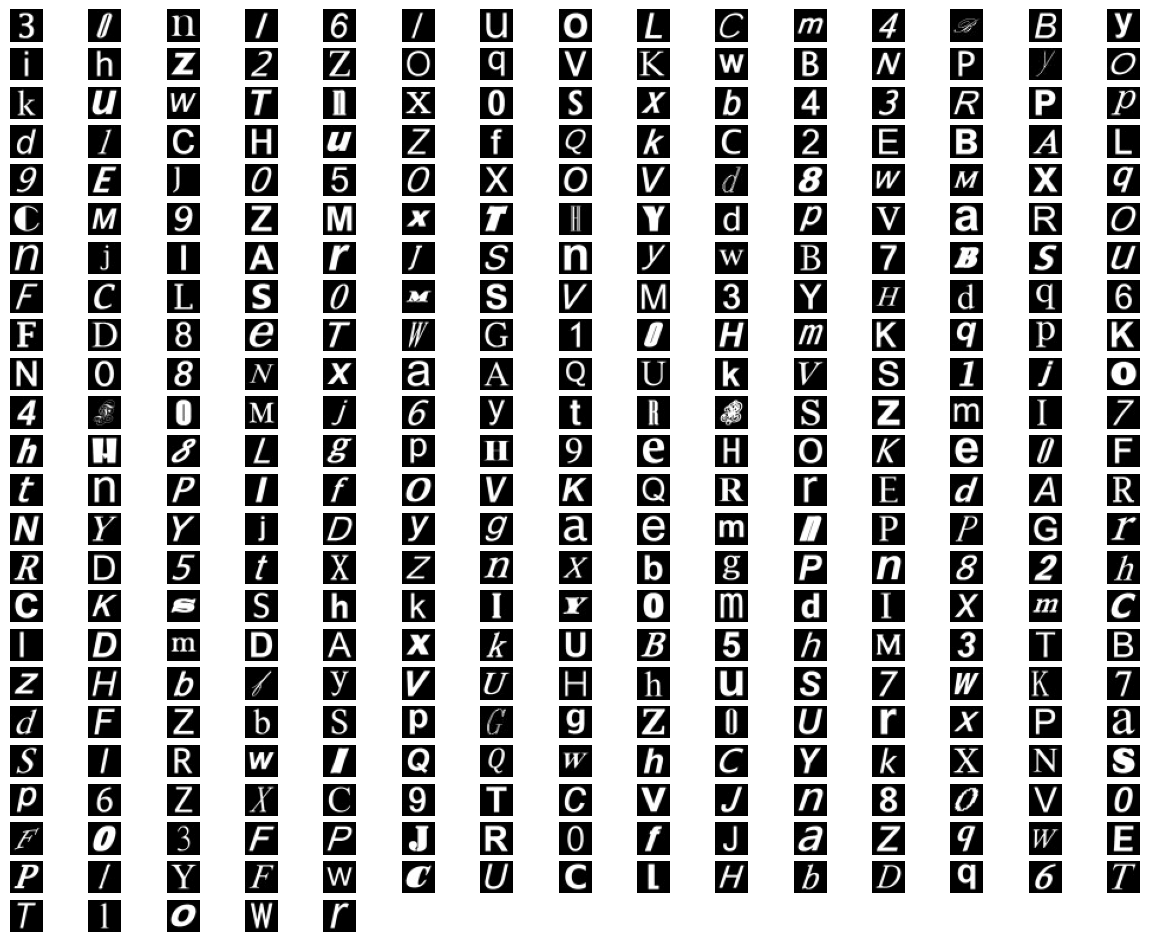

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
for index, X_representative_digit in enumerate(X_representative_digits):
  plt.subplot(30, 15, index+1)
  plt.imshow(X_representative_digit.reshape(28,28), cmap="binary")
  plt.axis('off')
plt.show()

Son las imágenes mas representativos de cada uno de los clusters, o sea las imagenes que son mas cercanos a un centroide dentro de un clusters.

El siguiente paso consiste en anotar manualmente estas etiquetas (aquí haremos trampas ya que disponemos de dichas etiquetas :p).

In [18]:
# seleccionar las etiquetas correspondientes a las muestras representativas
# identificadas en X_representative_digits basadas en los índices idxs.
y_representative_digits = y_train.values[idxs]

# Mostramos las etiquetas de las muestras representativas
print(y_representative_digits.shape)
print(y_representative_digits)

(350,)
[ 3  0 49 47  6 18 56 50 21 12 48  4 11 11 60 44 43 61  2 35 24 52 31 20
 58 11 23 25 60 24 46 56 58 29 49 59  0 28 33 37  4  3 27 25 51 39 47 38
 17 56 35 41 26 46 38  2 14 11 10 21  9 14 19  0  5 24 33 50 57 39  8 58
 48 59 52 12 22  9 61 22 59 29 17 34 39 51 31 36 27 24 49 45 47 10 53 19
 28 49 60 58 11  7 11 54 56 15 38 21 54  0 48 54 31 22  3 34 17 39 52  6
 15 13  8 40 29 32 16  1  0 17 48 20 52 51 20 23  0  8 23 33 36 10 26 30
 46 31 28  1 45 50  4 15  0 22 45  6 60 55 27 27 54 61 48 18  7 43 43  8
 21 42 51 17  9 40 17 50 20 40 50 15 55 49 25 47 41 50 31 20 26 27 53 40
 39 10 27 23 34 34 45 13 60 42 36 40 48 49 25 25 16 53 27 13  5 55 33 35
 49 33 37 42 25 49  8  2 43 38 20 54 28 43 46 18 60 50 48 39 18 59 48 12
 18 13 48 13 10 59 46 30 11  5 43 48  3 29 11 61 17 37 41 60 57 30 17 43
 56 28  7 32 20  7 39 15 35 37 28 51 16 42 61 50 30 53 33 25 36 54 18 27
 58 18 26 26 58 43 12 34 46 33 23 28 51  6 35 33 12  9 29 38 57 19 49  8
 50 31 24 15 50  3 15 25 45 27  0 41 19 36 6

**y_train.values[idxs]:** Utiliza los índices idxs para seleccionar las etiquetas correspondientes a las muestras representativas en el conjunto de entrenamiento.
Esto significa que y_representative_digits contendrá las etiquetas reales de las muestras que son consideradas representativas en el contexto del análisis de clustering.

**y_representative_digits:** Es un arreglo que contiene las etiquetas reales correspondientes a las muestras representativas identificadas por el algoritmo de clustering.
Cada valor en y_representative_digits representa la etiqueta real de una muestra representativa en el conjunto de entrenamiento.


El codigo asigna manualmente las etiquetas reales a las muestras representativas (y_representative_digits) proporciona un conjunto de datos etiquetado que puede utilizarse para entrenar y evaluar modelos supervisados después de realizar el análisis de clustering en datos no etiquetados.

## Entrenamiento de un clasificador

Y entrenaremos un clasificador usando estas imágenes representativas.

Después de haber seleccionado las muestras representativas (X_representative_digits) y sus etiquetas correspondientes (y_representative_digits), el siguiente bloque de código entrena un clasificador de regresión logística utilizando estas muestras representativas como conjunto de entrenamiento.

In [19]:
from sklearn.linear_model import LogisticRegression

log_reg2 = LogisticRegression(multi_class="ovr", solver="liblinear", max_iter=20000, random_state=42)
# Entrena el clasificador de regresión logística utilizando las muestras representativas (X_representative_digits)
# como características de entrada y sus etiquetas correspondientes (y_representative_digits) como valores objetivo.

%time log_reg2.fit(X_representative_digits, y_representative_digits)

# Calcula la precisión (accuracy) del clasificador sobre un conjunto
# de datos de prueba (X_test) y sus etiquetas correspondientes (y_test).
log_reg2.score(X_test_, y_test)

CPU times: total: 1.27 s
Wall time: 1.86 s


c:\Users\gonza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.5927454559885705

El resultado final de esta operación será la precisión del clasificador de regresión logística sobre los datos de prueba (X_test, y_test), después de haber sido entrenado con las muestras representativas seleccionadas y etiquetadas (X_representative_digits, y_representative_digits).

Como puedes observar hemos obtenido una precisión de casi el  58%  habiendo anotado simplemente 300 imágenes, pero aquellas más representativas. Entrenar el mismo modelo con 300 imágenes aleatorias nos daría peores resultados.

In [21]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=20000, random_state=42)
%time log_reg.fit(X_train_[:15000], y_train[:15000])
log_reg.score(X_test_, y_test)

CPU times: total: 56.5 s
Wall time: 1min 10s


0.7803793951900945

Esto pone de manifiesto que a la hora de entrenar modelos de ML no es tan importante la cantidad de datos, sino la calidad.


Ahora que tenemos un clasificador, podemos usarlo para anotar de manera automática el resto de imágenes. Para ello asignaremos, en cada grupo, la misma etiqueta a todas las muestras que la muestra representativa.

In [22]:
# Para almacenar las etiquetas propagadas después del proceso
y_train_propagated = np.empty(len(X_train_))  # clasificador
for i in range(k):
  y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

Asigna la etiqueta de la muestra representativa (y_representative_digits[i]) a todas las muestras del conjunto de entrenamiento que pertenecen al cluster i.

In [23]:
# mostramos los y_train_propagated
print(y_train_propagated.shape)
print(y_train_propagated)

(50393,)
[30. 31. 18. ... 43. 45. 47.]


In [24]:
log_reg3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=20000, random_state=42)
%time log_reg3.fit(X_train_[:15000], y_train_propagated[:15000])
log_reg3.score(X_test_, y_test)

CPU times: total: 52 s
Wall time: 53.5 s


0.5721088975315501

Esto sin embargo empeora nuestro clasificador, incluso usando más muestras de entrenamiento. Esto es debido al ruido que estamos introduciendo, ya que no todas las imágenes estarán bien agrupadas. Para mejorar esto podemos asignar etiquetas a aquellas muestras más cercanas a la imagen más representativa de cada grupo, o aplicar técnicas de aprendizaje activo.

## Aprendizaje Activo

El aprendizaje activo (o Active Learning) consiste en entrenar modelos de ML de manera iterativa, incluyendo en cada iteración nuevas muestras al dataset focalizando en ejemplos en loa que el modelo tenga más problemas.

El siguiente bloque de código implementa una estrategia de aprendizaje activo utilizando un clasificador previamente entrenado (log_reg3). Este enfoque de aprendizaje activo se basa en evaluar la incertidumbre del modelo con respecto a las predicciones realizadas sobre un conjunto de datos etiquetados parcialmente. 

In [25]:
# Utiliza el Clasificador log_reg3 para predecir las probabilidades de pertenencia a cada 
# clase para las primeras 1000 muestras del conjunto de entrenamiento 
probas = log_reg3.predict_proba(X_train_[:15000])

# Encuentra el índice de la clase con la probabilidad más alta para cada muestra en el conjunto de entrenamiento.
labels_ixs = np.argmax(probas, axis=1)
# Crea un arreglo labels que contiene las probabilidades correspondientes a la clase más probable para cada muestra.
labels = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)])
sorted_ixs = np.argsort(labels) #  Calcula los índices que ordenarían las probabilidades en orden ascendente.
labels[sorted_ixs[:10]]  # Selecciona las probabilidades de las 10 muestras con menor confianza (mayor incertidumbre) según el modelo.

array([0.16936466, 0.21625796, 0.22769897, 0.23164264, 0.2326403 ,
       0.2328173 , 0.23819538, 0.24019367, 0.24304443, 0.24483975])

El siguiente bloque de código se encarga de visualizar las imágenes correspondientes a las muestras con mayor incertidumbre (mayor confusión o menor confianza en las predicciones) según el modelo de clasificación

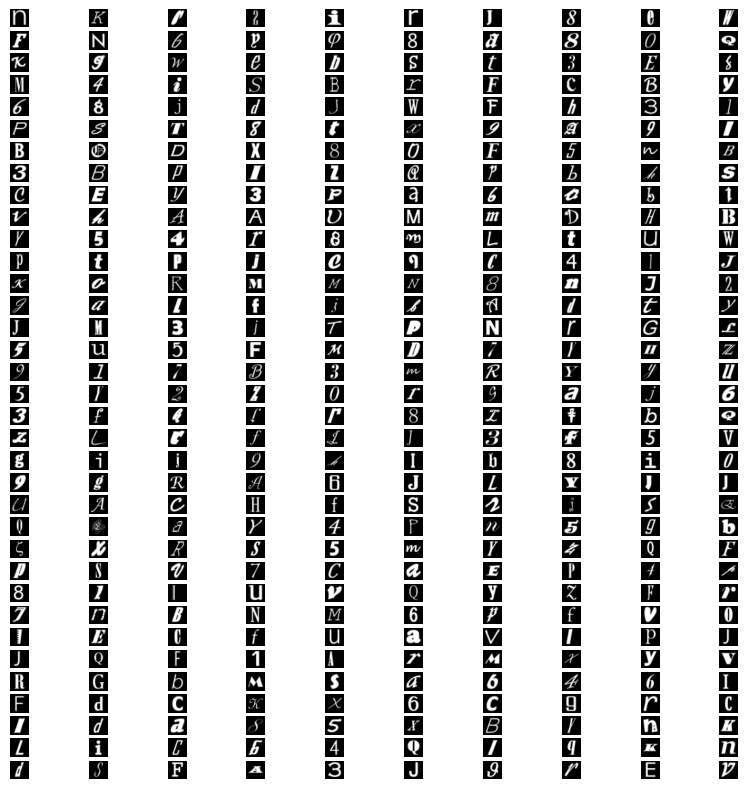

In [26]:
# Extrae las características (imágenes) correspondientes a las k muestras con mayor incertidumbre del conjunto de entrenamiento.
X_lowest = X_train_.values[:15000][sorted_ixs[:k]]
plt.figure(figsize=(10, 10))
for index, img in enumerate(X_lowest):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(img.reshape(28, 28), cmap="binary", interpolation="bilinear")
    plt.axis('off')
plt.show()

In [27]:
# Extracción de las Etiquetas de las Muestras con Mayor Incertidumbre
y_lowest = y_train.values[:15000][sorted_ixs[:k]]

# Mostramos las etiquetas de las muestras con mayor incertidumbre
y_lowest

array([49, 20, 53,  2, 44, 53, 19,  8, 40, 32, 15, 23,  6, 60, 45,  8, 36,
        8, 24, 26, 20, 42, 32, 40, 37, 28, 55,  3, 14, 42, 22,  4, 44, 28,
       11, 53, 15, 38, 11, 60,  6,  8, 45, 39, 19, 32, 15, 43,  3, 47, 25,
       28, 29,  8, 55, 59,  9, 10,  9, 44, 11, 24, 13, 33,  8, 50, 15,  5,
       49, 11,  3, 11, 51, 18, 61, 10, 51, 37, 43, 54, 12, 14, 34,  3, 25,
       36,  6, 50, 37,  1, 57, 43, 10, 10, 56, 22, 48, 13, 17, 11, 34,  5,
        4, 53,  8, 22, 21, 55, 56, 32, 51, 55, 25, 45, 12, 52, 12,  4,  1,
       19, 20, 50, 27, 22, 22, 23,  8, 49, 19,  2, 19, 36, 21, 41, 45, 37,
       10, 39, 55, 60, 19, 22,  3, 45, 29, 51, 23, 53, 16, 21,  5, 56,  5,
       15, 22, 13,  7, 34, 17, 61,  9, 47,  7, 11,  3, 48, 27, 60, 60, 56,
        5, 34,  2, 61,  0, 53, 16, 36, 45,  6,  3, 41, 46, 47, 53,  8, 21,
       55, 37, 26, 61, 21, 53, 41, 19, 19,  3, 41,  5, 31, 42, 44, 45,  9,
       43, 18, 37,  8, 44, 24,  9, 42, 27, 10,  6, 19, 21, 34, 19, 19, 30,
       10, 12, 17, 41, 28

El siguiente código realiza una actualización de las etiquetas en un conjunto de etiquetas propagadas (y_train_propagated) utilizando las etiquetas correspondientes a las muestras con mayor incertidumbre (y_lowest). A continuación, explicaré qué hace este código:

In [28]:
# Actualización de las Etiquetas de las Muestras con Mayor Incertidumbre
y_train2 = y_train_propagated[:15000].copy()

# y_train2: Es un arreglo de etiquetas actualizado, donde las etiquetas de las k muestras 
# con mayor incertidumbre en y_train_propagated han sido reemplazadas por las etiquetas correspondientes de y_lowest.
y_train2[sorted_ixs[:k]] = y_lowest

El código que actualiza las etiquetas en función de las muestras con mayor incertidumbre proporciona una manera eficaz de mejorar progresivamente el conjunto de etiquetas utilizado en el entrenamiento del modelo durante el aprendizaje activo, facilitando así la mejora iterativa del modelo de clasificación.

El siguiente código crea un nuevo clasificador de regresión logística (log_reg5) y lo entrena utilizando las etiquetas actualizadas (y_train2) en un subconjunto de muestras del conjunto de entrenamiento. Luego evalúa el desempeño de este clasificador en el conjunto de prueba (X_test, y_test)

In [30]:
# Mostramos las etiquetas de las muestras con mayor incertidumbre
log_reg5 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=20000, random_state=42)
%time log_reg5.fit(X_train_[:15000], y_train2)

# Calculamos la precisión del clasificador log_reg5 en el conjunto de prueba.
log_reg5.score(X_test_, y_test)

CPU times: total: 1min 4s
Wall time: 1min 28s


0.5817922057306135

 El código que crea, entrena y evalúa el clasificador de regresión logística log_reg5 utilizando etiquetas actualizadas a través del aprendizaje activo permite mejorar y validar la efectividad del modelo en la tarea de clasificación. La precisión obtenida en el conjunto de prueba sirve como métrica de rendimiento para evaluar la calidad del modelo entrenado.